<a href="https://colab.research.google.com/github/Driyaannt/PCVK_Ganjil_2023/blob/main/2141720224_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 11 – Metode Deteksi Objek: Template Matching, Edge Detection, Corner Detection, Grid Detection, Contour Detection

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

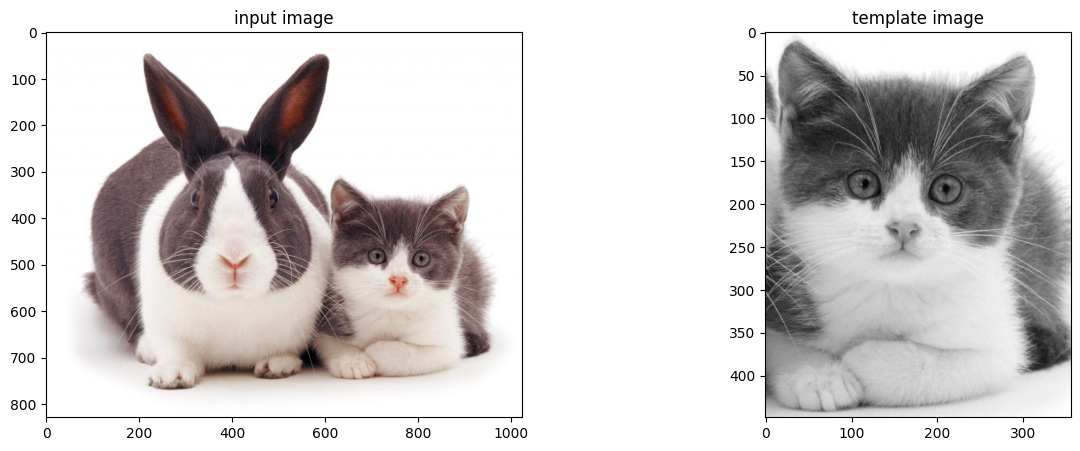

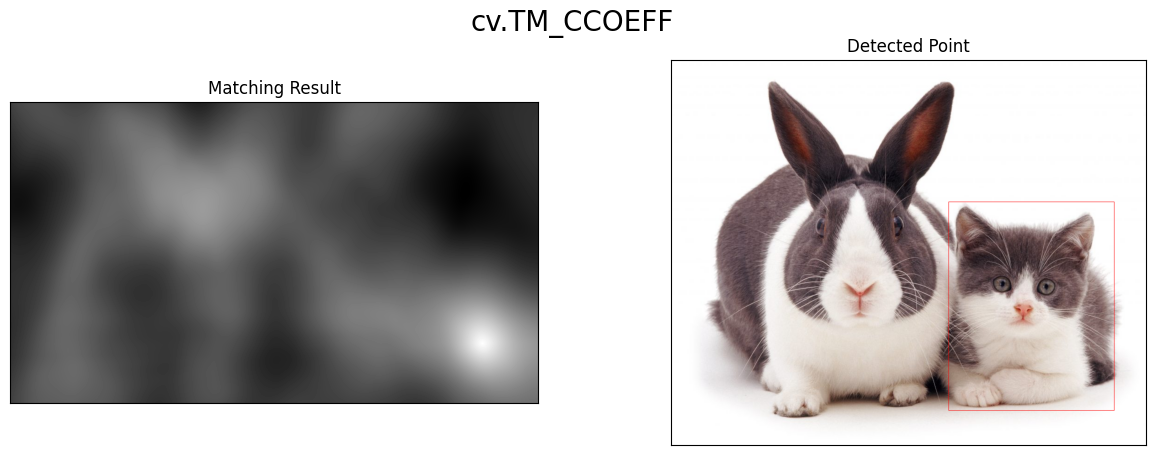

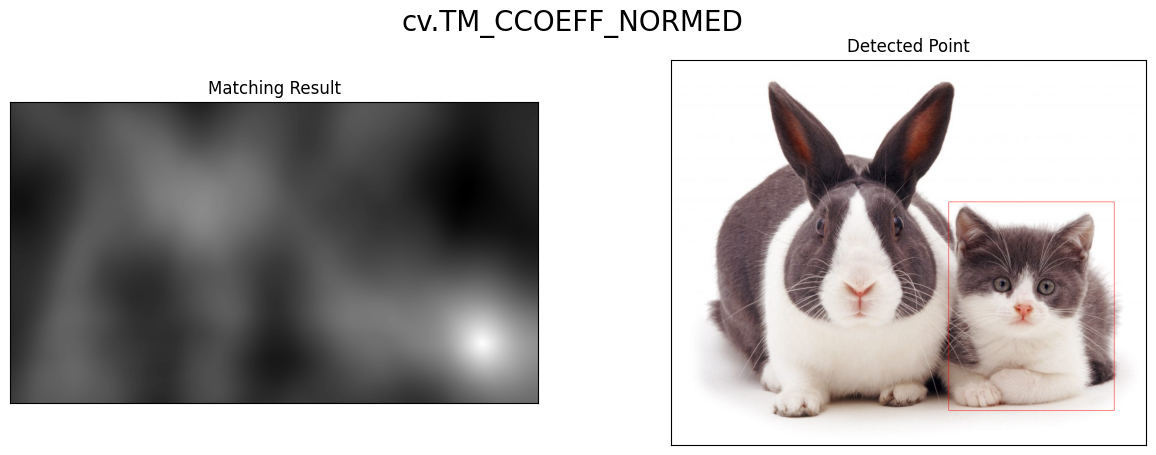

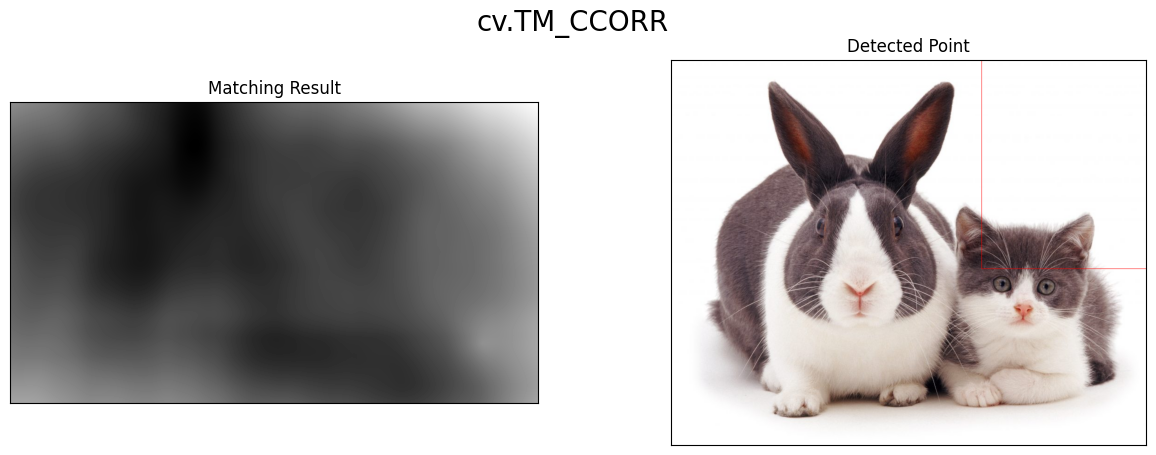

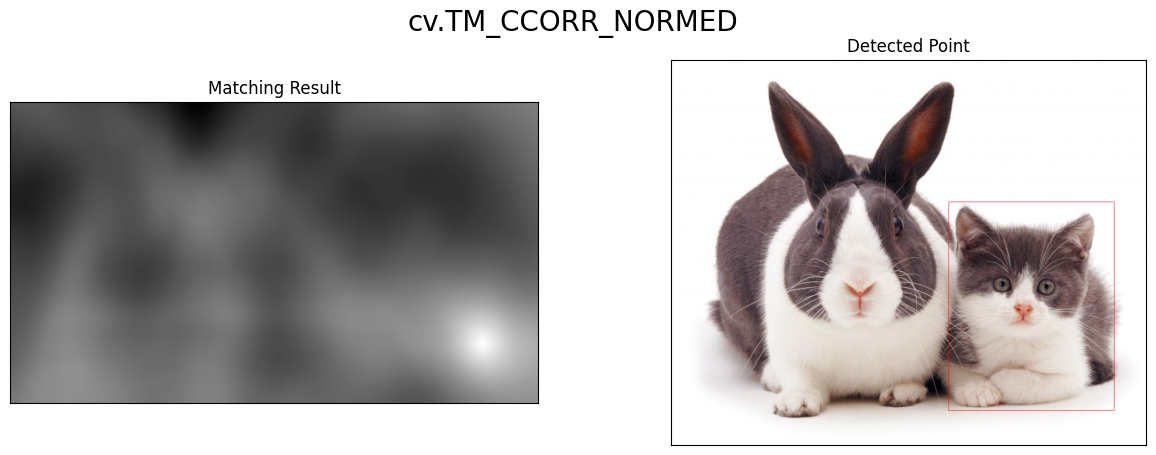

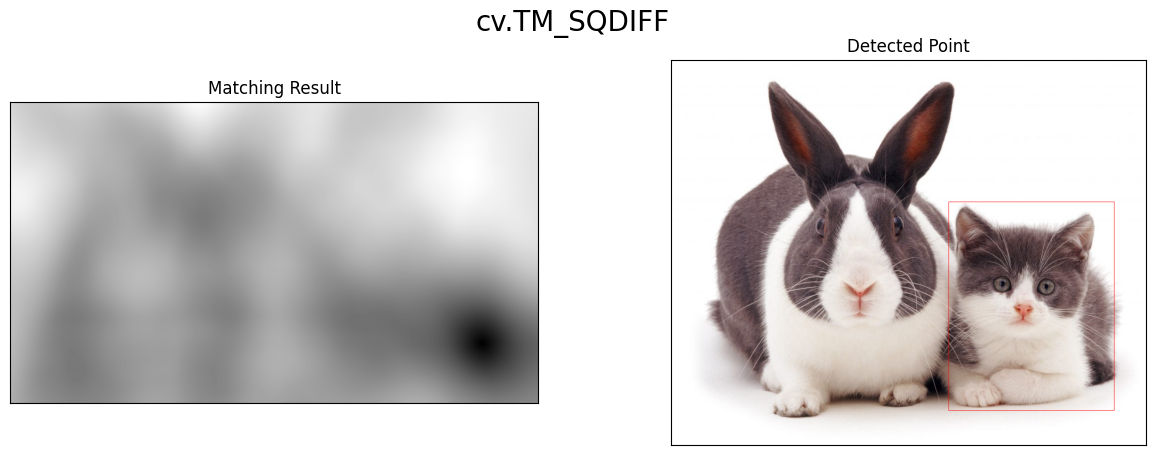

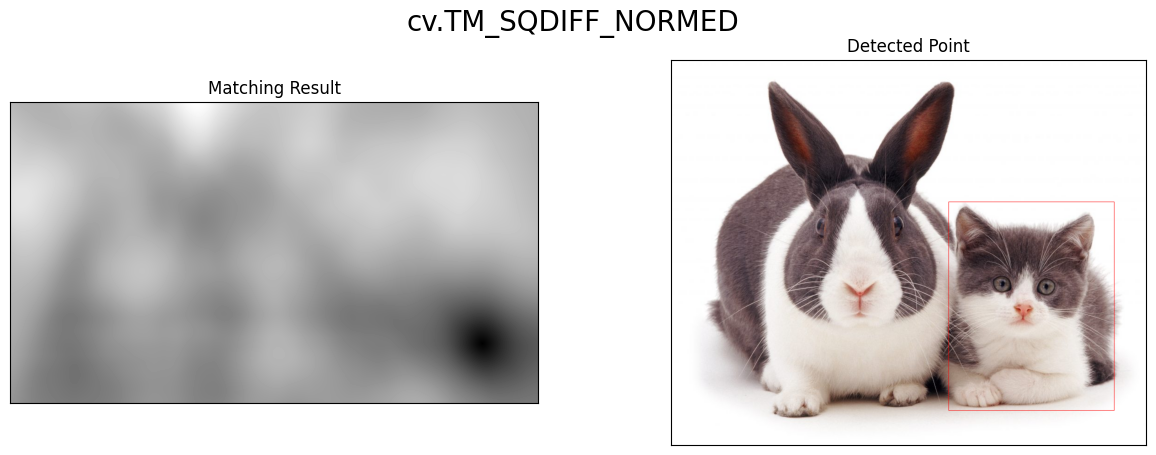

In [ ]:
img = cv.imread('/content/drive/MyDrive/images/pcvk/week-11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/images/pcvk/week-11/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

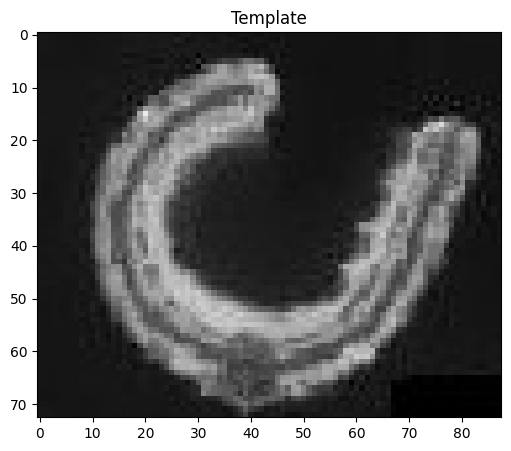

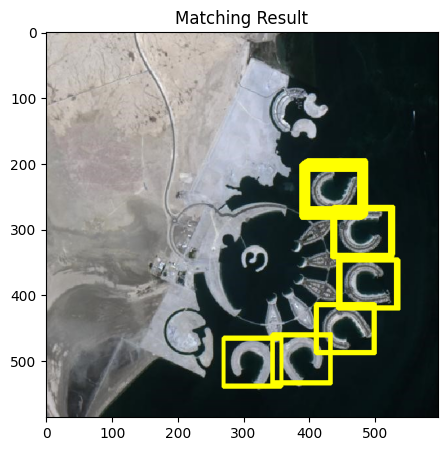

In [ ]:

img = cv.imread('/content/drive/MyDrive/images/pcvk/week-11/bahrain.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/images/pcvk/week-11/bahrain-template.jpg', cv.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)
threshold = 0.44

loc = np.where(res >= threshold)

plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title('Template')

thickness = 2

# Gambar kotak untuk setiap deteksi dengan ketebalan yang sama
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), thickness)

# Tampilkan hasil matching
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Matching Result')

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

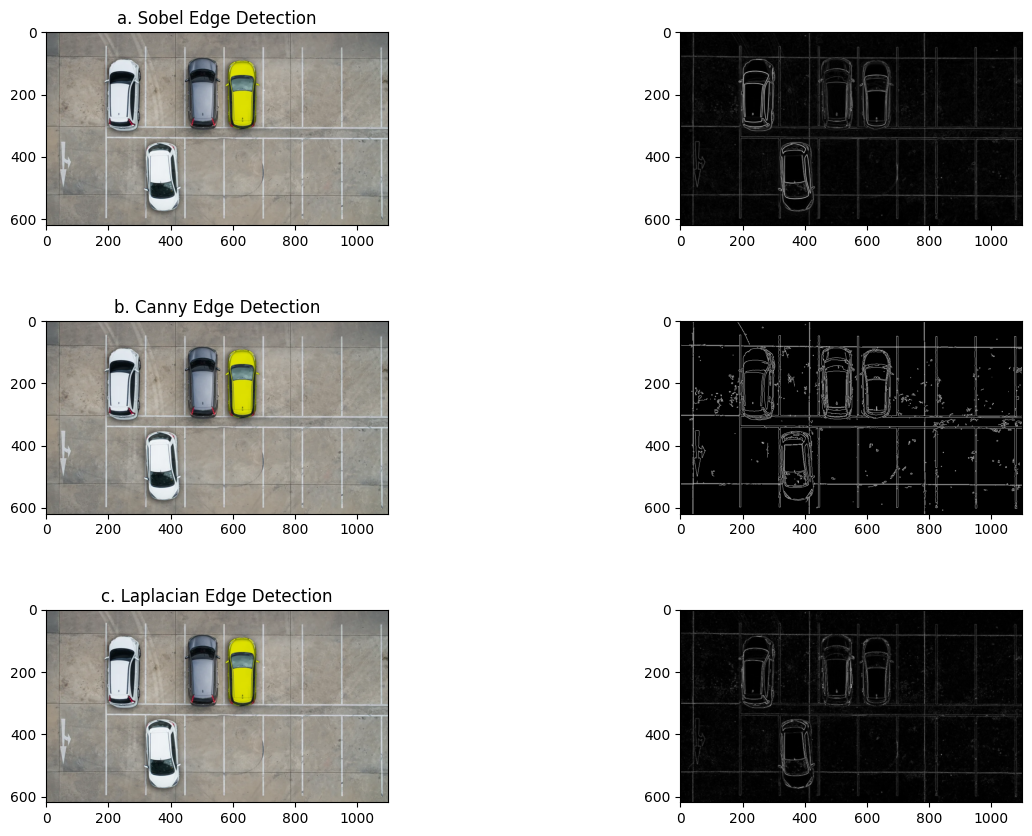

In [35]:
# Baca gambar
img = cv2.imread('/content/drive/MyDrive/images/pcvk/week-11/car-park.jpg')
img_gray = img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Metode Sobel Edge Detection
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Metode Canny Edge Detection
canny_edges = cv2.Canny(img_gray, 50, 150)

# Metode Laplacian Edge Detection
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian))

# Tampilkan hasil
plt.figure(figsize=(15, 10))

# Baris 1
plt.subplot(321), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('a. Sobel Edge Detection')

plt.subplot(322), plt.imshow(sobel_edges, cmap='gray')

plt.subplots_adjust(hspace=0.5)

# Baris 2
plt.subplot(323), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('b. Canny Edge Detection')

plt.subplot(324), plt.imshow(canny_edges, cmap='gray')

plt.subplots_adjust(hspace=0.5)

# Baris 3
plt.subplot(325), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('c. Laplacian Edge Detection')

plt.subplot(326), plt.imshow(laplacian_edges, cmap='gray')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

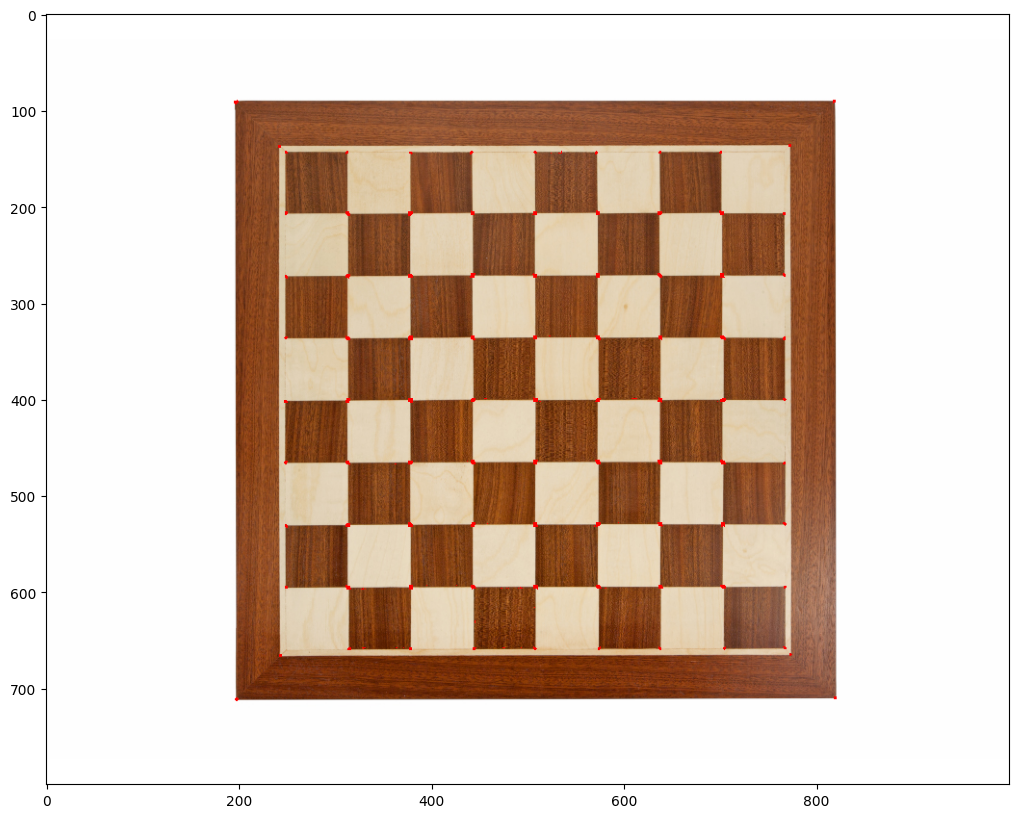

In [ ]:
#Harris Corner Detection

#load citra input
input_img = cv.imread('/content/drive/MyDrive/images/pcvk/week-11/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


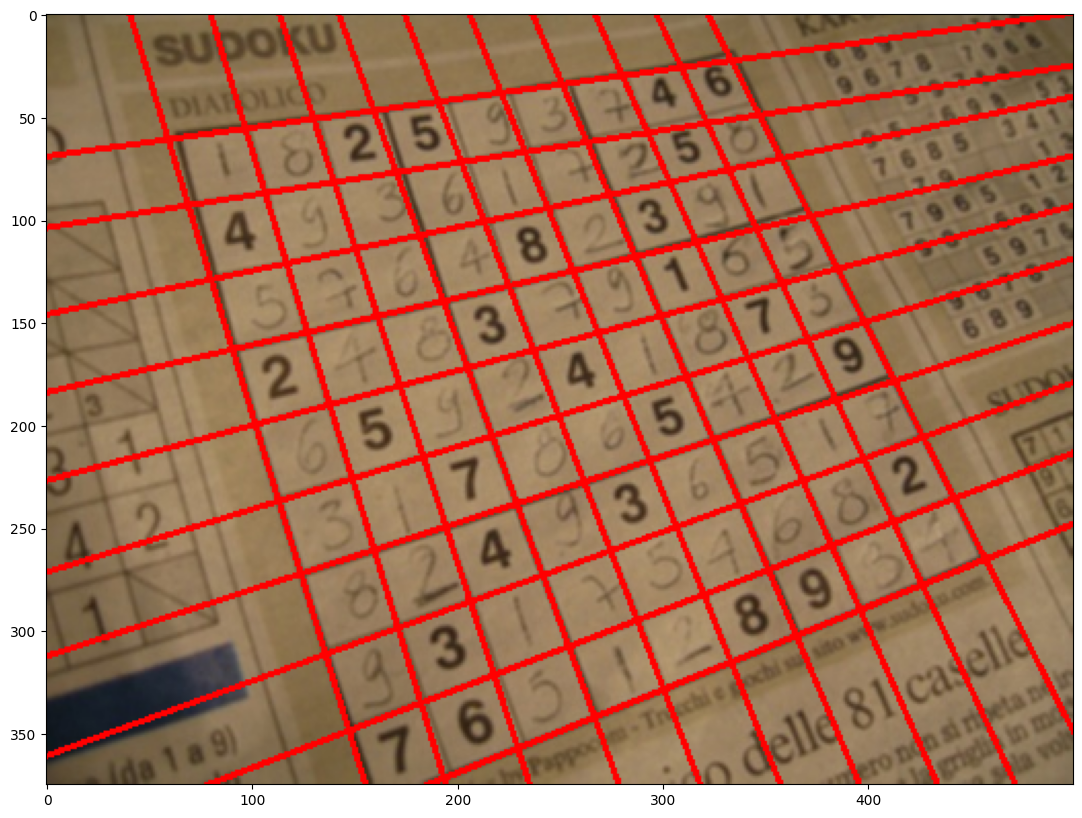

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/images/pcvk/week-11/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

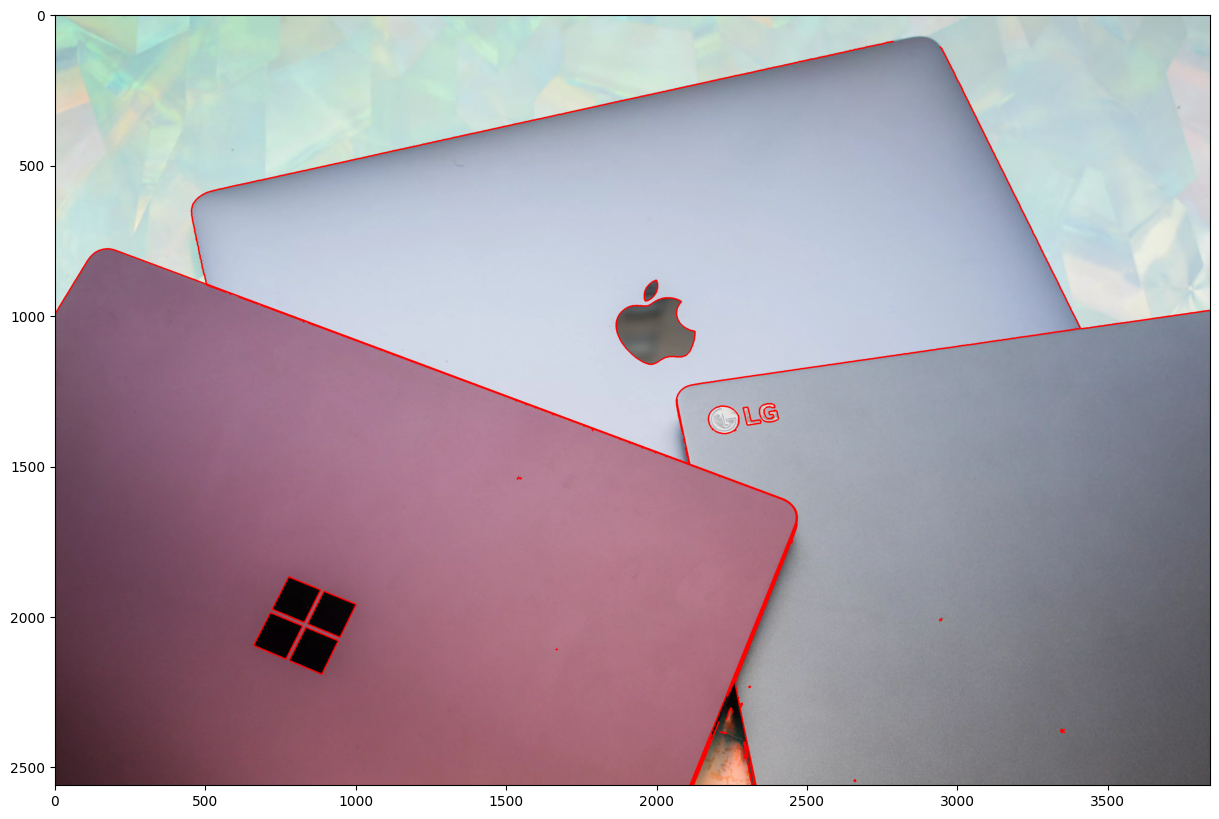

In [ ]:
img = cv.imread('/content/drive/MyDrive/images/pcvk/week-11/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### Pengayaan Materi KTP

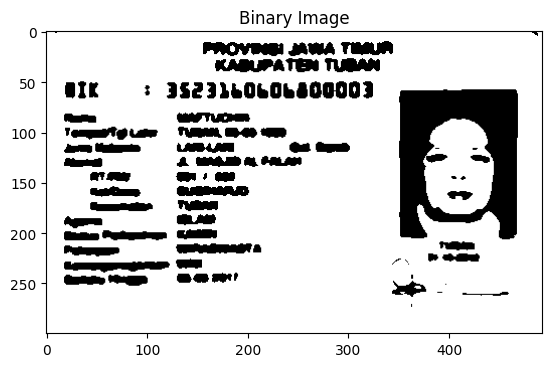

In [24]:
import cv2
import os
import matplotlib.pyplot as plt

# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/images/pcvk/week-11/"
file_name = "ktp3.png"

# Baca gambar
src = cv2.imread(os.path.join(path_plate, file_name))

# Salin gambar asli untuk pengolahan lebih lanjut
blurred = src.copy()

# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(blurred, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Binarisasi dengan Otsu's thresholding
ret, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan gambar menggunakan Matplotlib
plt.imshow(bw, cmap='gray')
plt.title('Binary Image')
plt.show()


(Text(0.5, 1.0, 'Hasil Akhir'), (-0.5, 492.5, 299.5, -0.5))

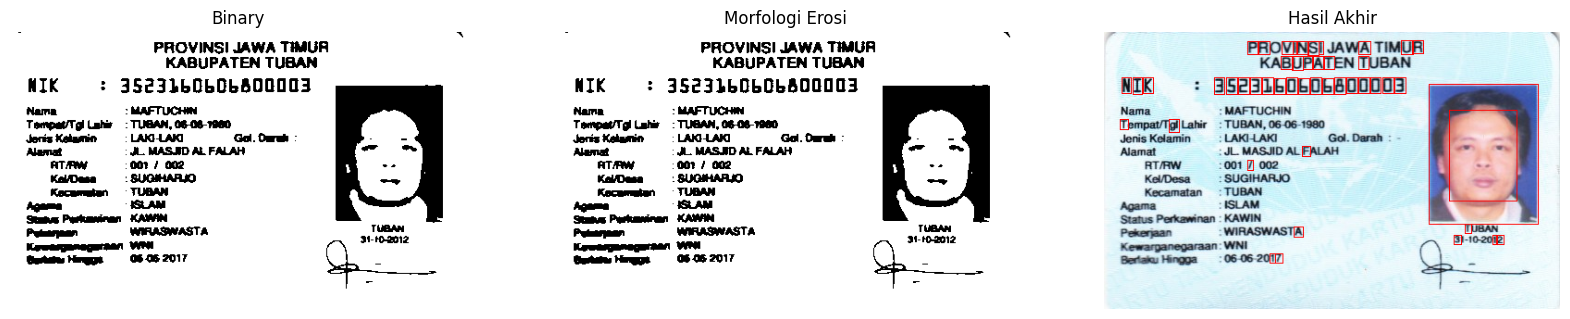

In [30]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

ktp = cv.imread("/content/drive/MyDrive/images/pcvk/week-11/ktp3.png")

# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Binerisasi citra dengan Otsu's thresholding
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(20,20))
# Gambar hasil biner
plt.subplot(131), plt.imshow(bw, cmap='gray')
plt.title('Binary'), plt.axis('off')

# Gambar hasil morfologi erosi
plt.subplot(132), plt.imshow(erode, cmap='gray')
plt.title('Morfologi Erosi'), plt.axis('off')

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.subplot(133), plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Hasil Akhir'), plt.axis('off')



# Tugas Praktikum

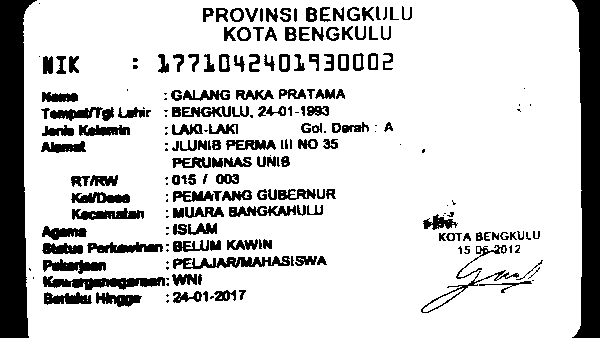

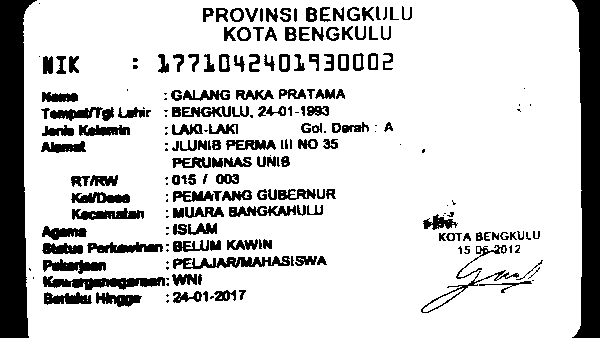

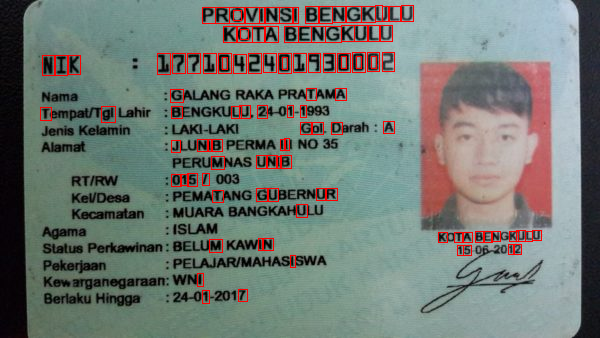

In [32]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

ktp = cv.imread("/content/drive/MyDrive/images/pcvk/week-11/ktp.png")

# Binerisasi citra dengan Otsu's thresholding dan morfologi erosi
gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
_, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
erode = cv.erode(bw, cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur dari citra hasil erosi
contours, _ = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Inisialisasi citra hasil akhir
result_ktp = ktp.copy()

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(result_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar menggunakan cv2_imshow
cv2_imshow(bw)
cv2_imshow(erode)
cv2_imshow(result_ktp)
cv2.waitKey(0)
cv2.destroyAllWindows()
